In [1]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
~data.duplicated()

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
dtype: bool

In [6]:
data.shape

(50, 5)

In [7]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


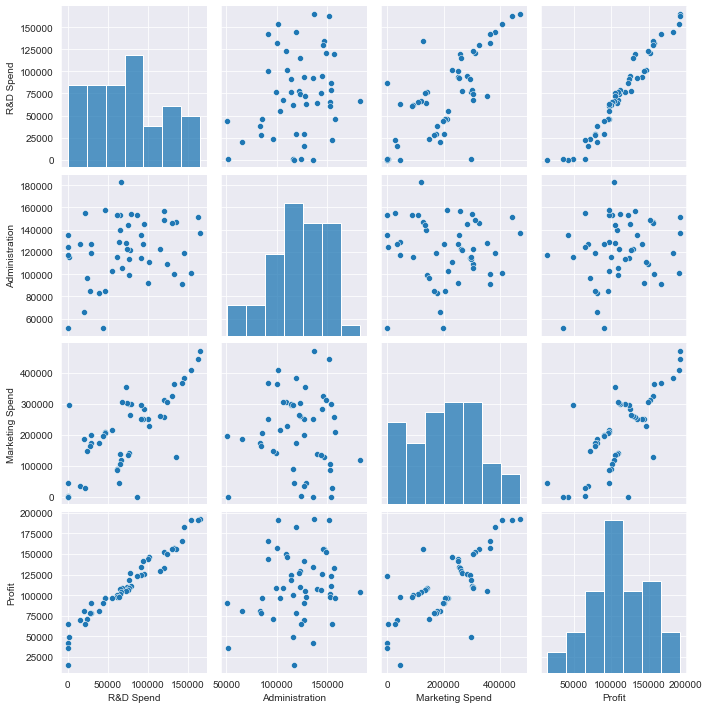

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [10]:
data1=data.rename({"R&D Spend":"RDS","Administration":"ADM","Marketing Spend":"MS","Profit":"PR"},axis=1)

In [11]:
data1

,RDS,ADM,MS,State,PR
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
data1.shape

(50, 5)

In [13]:
import statsmodels.formula.api as smf 
model = smf.ols('PR~RDS+ADM+MS',data=data1).fit()

In [14]:
model.rsquared

0.9507459940683246

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        17:59:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model.params


Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MS               0.027228
dtype: float64

In [17]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [18]:
pr_rds=smf.ols('PR~RDS',data = data1).fit()  
#t and p-Values
print(pr_rds.tvalues, '\n', pr_rds.pvalues)  

Intercept    19.320288
RDS          29.151139
dtype: float64 
 Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64


In [19]:
pr_rds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           3.50e-32
Time:                        17:59:43   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDS            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
pr_adm=smf.ols('PR~ADM',data = data1).fit()  
#t and p-Values
print(pr_adm.tvalues, '\n', pr_adm.pvalues)  

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [21]:
pr_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 17 Jul 2023   Prob (F-statistic):              0.162
Time:                        17:59:43   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
pr_ms=smf.ols('PR~MS',data = data1).fit()  
#t and p-Values
print(pr_ms.tvalues, '\n', pr_ms.pvalues) 

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [23]:
pr_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           4.38e-10
Time:                        17:59:43   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
pr_adms=smf.ols('PR~ADM+MS',data = data1).fit()  
#t and p-Values
print(pr_adms.tvalues, '\n', pr_adms.pvalues)

Intercept    1.142741
ADM          2.467779
MS           8.281039
dtype: float64 
 Intercept    2.589341e-01
ADM          1.729198e-02
MS           9.727245e-11
dtype: float64


In [25]:
pr_adms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           2.50e-10
Time:                        17:59:43   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [26]:
rsq_rds = smf.ols('RDS~ADM+MS',data=data1).fit().rsquared  
vif_rds = 1/(1-rsq_rds) # 19

rsq_adm = smf.ols('ADM~RDS+MS',data=data1).fit().rsquared  
vif_adm = 1/(1-rsq_adm) # 625

rsq_ms = smf.ols('MS~RDS+ADM',data=data1).fit().rsquared  
vif_ms = 1/(1-rsq_ms) #  624

# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADM','MS'],'VIF':[vif_rds,vif_adm,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MS,2.326773


# Residual Analysis

## Test for Normality of Residuals(Q-Q plot)

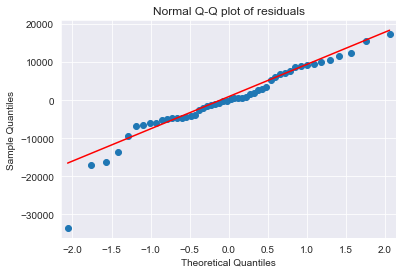

In [27]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Residual Plot for HOmoscedasticity

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

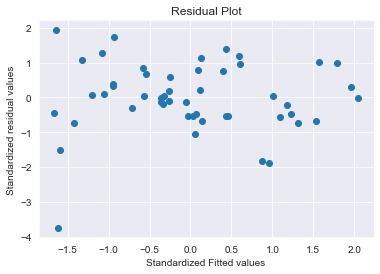

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residaul Vs Regressors

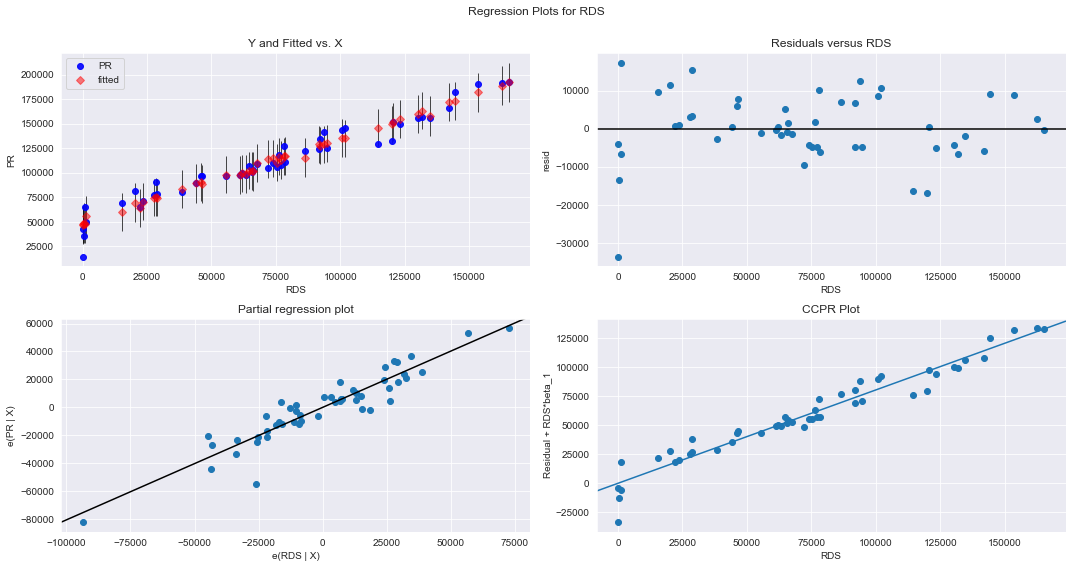

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

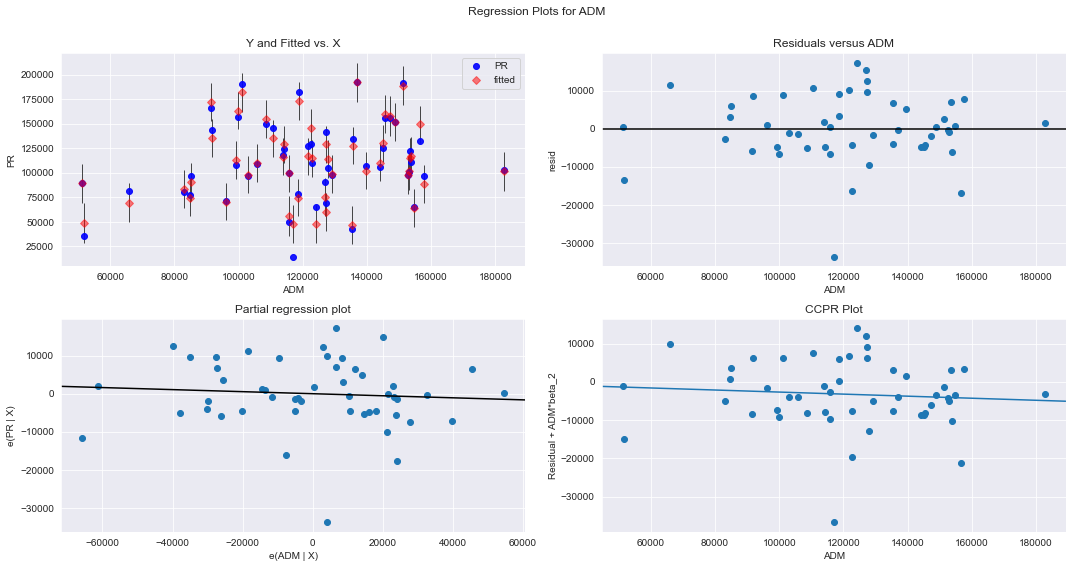

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

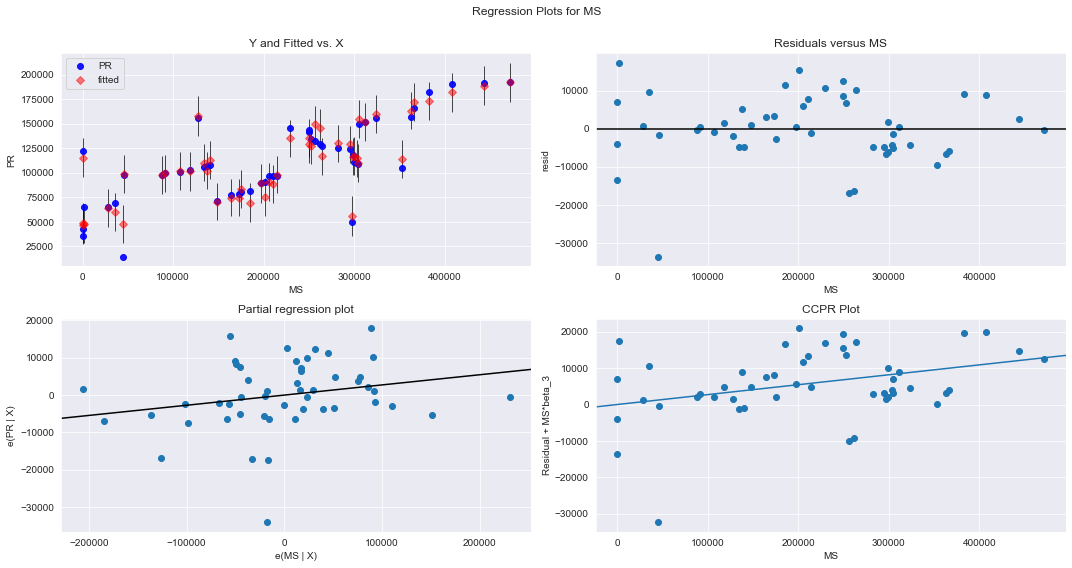

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers 

## Cook's Distance

In [33]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [34]:
K=3
N=50
3*(K+1)/N

0.24

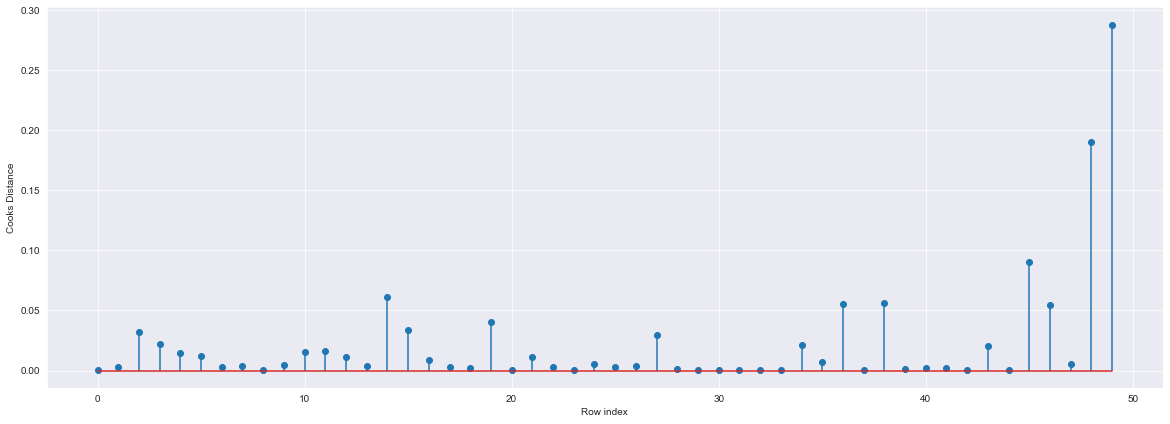

In [35]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543264)

# High Influence points

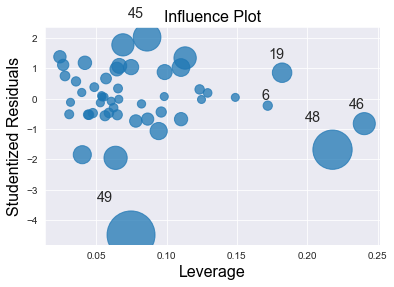

In [37]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [38]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

#### From the above plot it is evident that data point 49 is the influencer

In [39]:
data1[data1.index.isin([49])]

,RDS,ADM,MS,State,PR
49,0.0,116983.8,45173.06,California,14681.4


In [40]:
data1.head()

,RDS,ADM,MS,State,PR
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [41]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index()

In [42]:
data2=data2.drop(['index'],axis=1)

In [43]:
data2

,RDS,ADM,MS,State,PR
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [44]:
model1=smf.ols("PR~RDS+ADM+MS",data=data2).fit()

In [45]:
model1.rsquared

0.9613162435129847